<a href="https://colab.research.google.com/github/marciusdm/artigos/blob/main/storytellingchapter8/ExemplosStoryTelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo do capítulo 8 do livro Storytelling com dados
Neste notebook iremos abordar algumas técnicas proposta pela analista de dados note-america Cole N. Knafflic em seu livro [Storytelling com dados](https://www.amazon.com.br/Storytelling-com-Dados-Visualização-Profissionais/dp/8550804681), mais precisamente o capítulo 8 do livro.  
Neste capítulo, ela expõe uma situação hipotética em que uma startup está lancçando um  produto novo no mercado e tem-se à dispoição um histórico da evolução dos preços de 2008 a 2014 para os produtos dos 5 principais concorrentes do mercado  O primeiro gráfico mostrado é um com barras que mostra comparativamente os preços dos produtos agrupados por ano. Porém o gráfico, segundo a autora do livro, deixa muito a desejar, pois está poluído visualmente e não mostra claramente a evolução dos preços dos produtos. 
Então, fazendo vários aprimoramentos, chega-se a um gráfico de linhas que mostra a mesma informação de forma mais clara e enxuta.  
Tais melhorias seguem as propostas elaboradas pela autora para a visualização e a comunicação eficaz com dados. Que são as seguintes:
* Entender o contexto;
* Escolher um visual apropriado;
* Eliminar a saturação;
* Chamar a atenção para onde você quer
* Pensar como um designer
* Contar uma história

Para saber um pouco mais sobre estas propostas clique neste [link](https://pocketbook4you.com/pt/read/storytelling-with-data).  

As imagens a seguir mostram o primeiro gráfico, e o gráfico final. Percebam como o último gráfico é mais agradável visualmente.  
<br/>

Gráfico inicial: <br/>
<img src="https://cdn-images-1.medium.com/max/800/1*nn1Kl9pWGHwsoJOC_EOPKA.png" />

<br />
Gráfico final: <br/> 
<img src="https://cdn-images-1.medium.com/max/800/1*72svxEYetL_n53tInt41Ew.png"/>
<br />
Dados que foram utilizados para gerar os gráficos:
<img src="https://cdn-images-1.medium.com/max/800/1*554aNglaj_tA3aaW_OvYLQ.png" />

A autora utilizaou o Excel para gerar estes gráficos, porém é possível utilzar o Matplotlib para esta finalidade.   
Obs: para que este notebook não fique muito extenso irei iniciar já com o gráfico de linhas, com as opções padrão e a seguir, fazendo as melhorias propostas pela Cole.

##Importando as bibliotecas necessárias

In [1]:
#importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [2]:
#definicoes de cores
AZUL='b'
CINZA = '0.5'
CINZA_CLARO = "0.7"
CINZA_ESCURO = "0.2"


## Criando os dados de exemplo

In [3]:
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
datasource = {
  'Product A': [395, 420, 425, 390, 300, 270, 260],
  'Product B': [360, 400, 425, 410, 375, 290, 250],
  'Product C': [None,None,100, 180, 198, 240, 180],
  'Product D': [None,None,None,160, 260, 220, 215],
  'Product E': [None,None,None,None,None,98, 210]
}
# plotar os 2 gráficos


##Etapa 1: Opções padrão
Nesta etapa vamos criar um gráfico de linas com as opções padrão da biblioteca Matplotli

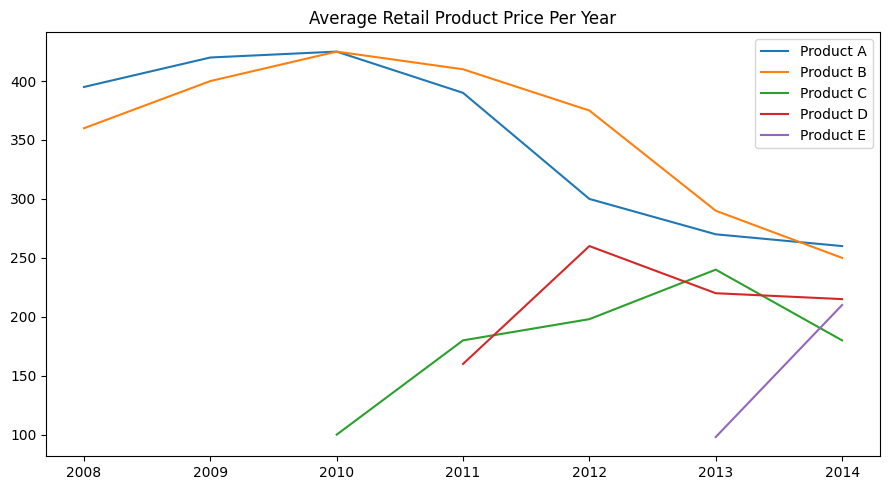

In [ ]:
#Versão 1: opções padrão

fig, ax = plt.subplots(figsize=(9,5))
ax.set_title("Average Retail Product Price Per Year")
for item in datasource:
    ax.plot(years,datasource[item], label=item)
ax.legend()
plt.tight_layout()    

## Etapa 1: primeiros ajustes
Nesta etapa vamos eliminar a satuação, ou seja, remover elementos desnecessários do gráfico. Além disso serão feitas algumas melhorias.

O que será feito nesta etapa:
1. Remover as bordas superior e direita
2. Adicionar títulos dos eixos horizontal e vertical
3. Aumentar a espessura das barras


In [4]:
#função para remover as bordas superior e direita do gráfico
def remove_right_top_spines(ax):
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)


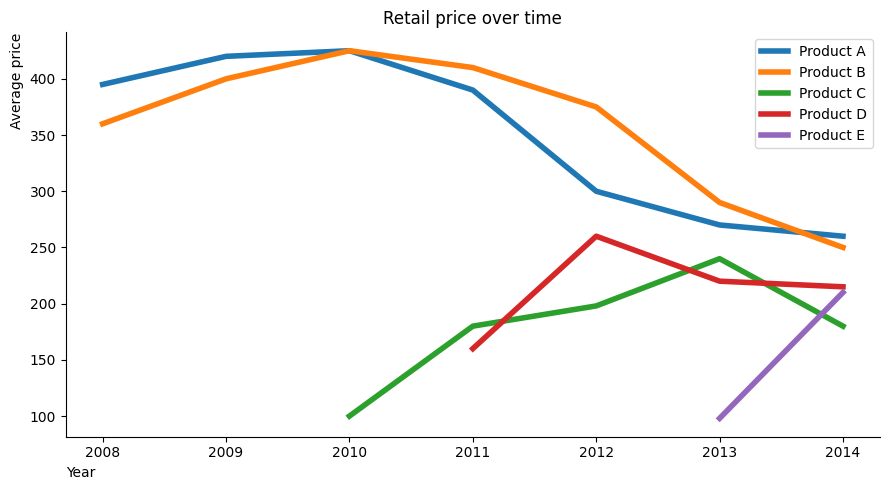

In [5]:
#Personalização nº 1:
fig, ax = plt.subplots(figsize=(9,5))
remove_right_top_spines(ax)
#adicionando títulos nos eixos X e Y
ax.set_xlabel("Year", loc='left')
ax.set_ylabel("Average price", loc='top')
ax.set_title("Retail price over time")
for item in datasource:
    ax.plot(years,datasource[item], label=item, linewidth=4) #atribuoto linewidth define espessura da barra
ax.legend()
plt.tight_layout()    

## Etapa 2
Procedimentos:
* Aumentar limite do eixo vertical e exibir os rótulos de 100 em 100
* Exibir os números do eixo vertical em formato de moeda
* Aumentar o espaço entre a origem e a marca do ano 2008
* Alinhar o título à esquerda


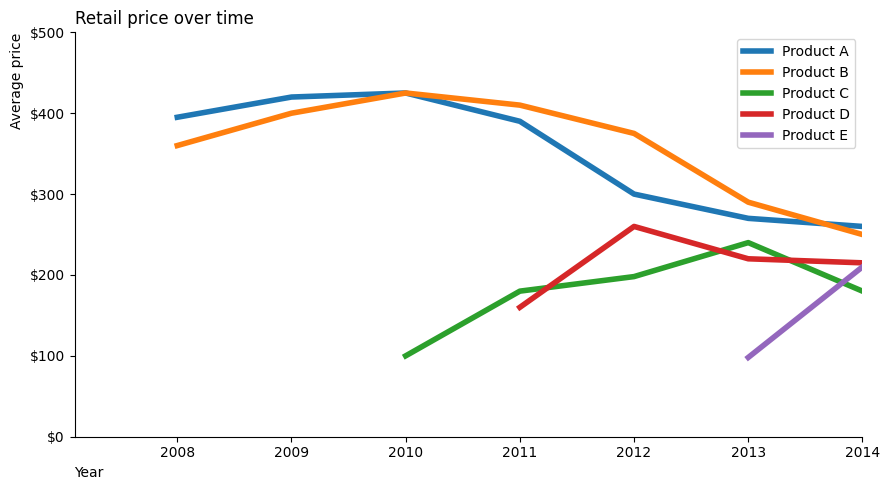

In [ ]:
#Personalização nº 2:
# - Aumentar limite do eixo vertical e exibir os rótulos de 100 em 100
# - Exibir os números do eixo vertical em formato de moeda
# - aumentar o espaço entre a origem e a marca do ano 2008
# - alinhar o título à esquerda
fig, ax = plt.subplots(figsize=(9,5))
remove_right_top_spines(ax)
ax.set_ylabel("Average price", loc='top')
ax.set_xlabel("Year", loc='left')
#alinhando título à esquerda
ax.set_title("Retail price over time", loc='left')
#inserir o símbolo $ nos valores dos eixo y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
#definir os extremos do eixo y como 0 e 500
ax.set_ylim(bottom=0,top=500)
#aumetar o espaço entre a origem e a marca do ano 2008
# o limite inferior foi colocado intencionalente em 2007.1 para que o rótulo 2007 não aparecesse no gráfico
ax.set_xlim(left=2007.1, right=2014)
#ax.text(2007.5, 445, "Retail price over time", fontsize=24, color=CINZA_CLARO, fontweight='bold')
for item in datasource:
    ax.plot(years,datasource[item], label=item, linewidth=4)
ax.legend()
plt.tight_layout()    


## Etapa 3
Procedimentos:
* Legendar as linhas diretamente
* Colocar todas as barras com a mesma cor
* Alinhar o título  no início do gráfico
* Colocar as linhas e legendas dos eixos em segundo plano, com uma cor mais clara
* Alinhar o título do eixo x com a legenda mais à esquerda 


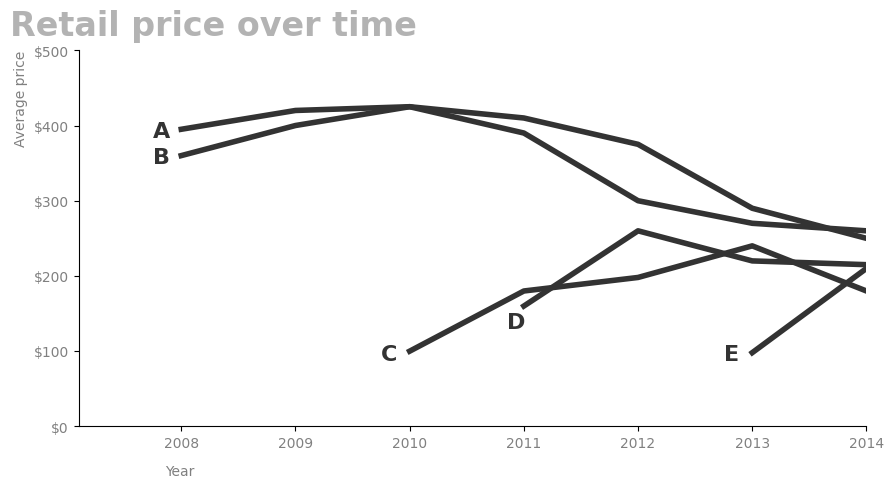

In [ ]:
#Personalização nº 3:
fig, ax = plt.subplots(figsize=(9,5))
remove_right_top_spines(ax)
ax.set_ylabel("Average price", loc='top', color=CINZA)
ax.set_xlabel("Year", loc='left', color=CINZA)
# O método set_title, com o parãmetro loc definido como left, alinha o título com a barra do eixo y, mas queremos colocá-lo no canto esquerdo do gráfico
# Então devemos colocar o título como um texto avulso no gráfico utilizando o método Axis.text
ax.text(2006.5, 520, "Retail price over time", fontsize=24, color=CINZA_CLARO, fontweight='bold')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
#alinhar o título do eixo x com a legenda mais à esquerda
ax.xaxis.set_label_coords(0.11,-0.1)
ax.tick_params(labelcolor=CINZA)
ax.set_ylim(bottom=0,top=500)
ax.set_xlim(left=2007.1, right=2014)
#Legendar as linhas diretamente
ax.text( 2007.75,385, "A", fontsize=16,color=CINZA_ESCURO, fontweight='bold')
ax.text( 2007.75,350, "B", fontsize=16,color=CINZA_ESCURO, fontweight='bold')
ax.text( 2009.75,88, "C", fontsize=16,color=CINZA_ESCURO, fontweight='bold')
ax.text( 2010.85,130, "D", fontsize=16,color=CINZA_ESCURO, fontweight='bold')
ax.text( 2012.75,88, "E", fontsize=16,color=CINZA_ESCURO, fontweight='bold')
for item in datasource:
    ax.plot(years,datasource[item], label=item, linewidth=4, color=CINZA_ESCURO)
plt.tight_layout()    


## Etapa 4
Procedimentos:
* Inserir o retângulo que destaca a região com o preço recomendado de lançamento
* Mostrar o preço médio dos produtos em 2014.
* Adicionar mensagem na parte superior do gráfico

In [ ]:
#calcular a média dos preços em 2014
def calculate_mean(data):
  sum = 0.0
  for item in data:
    sum += data[item][6]
  return sum/len(data)  

#Destacar o valor médio dos produtos em 2014,  para isso, iremos plotar um gráfico de dispersão (scatter)
def make_circle(ax, avg):
  final_year = [2014]
  mean_value = [avg]
  ax.scatter(final_year, mean_value, s=90, color=AZUL, clip_on=False)
  #adicionando o texto "AVG" próximo ao ponto que marca a média de preços
  ax.annotate(
        "AVG",
        xy=(2014, avg),
        xytext=(-30, -2),
        textcoords='offset points',
        color=AZUL,
        fontsize=12,
        fontweight='medium'
    )

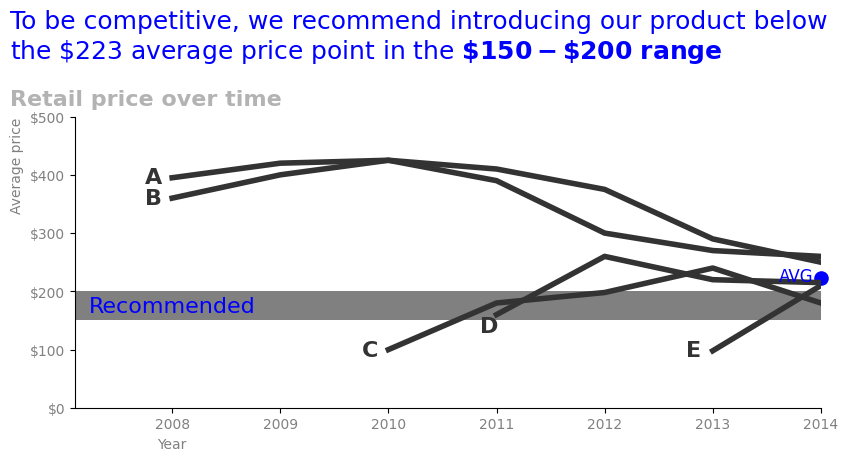

In [99]:
fig, ax = plt.subplots(figsize=(9,5))
remove_right_top_spines(ax)
ax.set_ylabel("Average price", loc='top', color=CINZA)
ax.set_xlabel("Year", loc='left', color=CINZA)
#adiciona mensagem no alto do gráfico
#'$\\bf{text 1}$'
#Inserindo o comando \br do latex para colocar texto em negrito. Para ser inserodpo espaço, é necessário colocar caracter de escape "\" antes
ax.text(2006.5, 600,"To be competitive, we recommend introducing our product below\nthe \$223 average price point in the $\\bf{\$150 - \$200\ range}$",
        fontsize=18, color=AZUL)
ax.text(2006.5, 520, "Retail price over time", fontsize=16, color=CINZA_CLARO, fontweight='bold')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
ax.xaxis.set_label_coords(0.11,-0.1)
ax.tick_params(labelcolor=CINZA)
ax.set_ylim(bottom=0,top=500)
ax.set_xlim(left=2007.1, right=2014)
#Obtém o valor médio dos preços dos produtos em 2014
mean = calculate_mean(datasource)
make_circle(ax, mean)
ax.text( 2007.75,385, "A", fontsize=16,color=CINZA_ESCURO, fontweight='bold')
ax.text( 2007.75,350, "B", fontsize=16,color=CINZA_ESCURO, fontweight='bold')
ax.text( 2009.75,88, "C", fontsize=16,color=CINZA_ESCURO, fontweight='bold')
ax.text( 2010.85,130, "D", fontsize=16,color=CINZA_ESCURO, fontweight='bold')
ax.text( 2012.75,88, "E", fontsize=16,color=CINZA_ESCURO, fontweight='bold')
#Destaca a região com preço ideal do novo produto a ser lançado
ax.axhspan(150, 200, facecolor=CINZA)
ax.text(2007.23, 165, 'Recommended', fontsize=16,color=AZUL)

for item in datasource:
    ax.plot(years,datasource[item], label=item, linewidth=4, color=CINZA_ESCURO)
plt.tight_layout()    


Com isso encerramos as personalizações e vimos que o Matplotlib oferece diversos recursos de personalização permitindo a criação de gráficos impactantes.